# Feed Forward Neural Network

In [1]:
# Importing libraries and dataset
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch
import numpy as np
from sklearn.datasets import load_diabetes
from torch.utils.data import Dataset, DataLoader
from torch import nn

In [2]:
# Loading the dataset
data = load_diabetes()
x = data['data']
y = data['target']

In [3]:
# Print the shape
print('shape of x is : ',x.shape)
print('shape of y is : ',y.shape)

shape of x is :  (442, 10)
shape of y is :  (442,)


Dataset and dataloaders

In PyTorch, the class dataset covers the data in a tuple so as to make each data of the index accessible during training. 

In order to shuffle and apply Mini-Batch Gradient Descent or stochastic gradient descent it is necessary to create dataloader class.

In [4]:
class inputdataset(Dataset):
  def __init__(self,x,y):
    # initialize the x and y of the dataset and convert them to tensors
    self.x = torch.tensor(x,dtype=torch.float32)
    self.y = torch.tensor(y,dtype=torch.float32)
    self.length = self.x.shape[0]

  def __getitem__(self,idx):
    # return a particular index (both x and y value) in the dataset
    return self.x[idx],self.y[idx]

  def __len__(self):
    # return the size of the dataset
    return self.length

In [5]:
dataset = inputdataset(x,y)

In [6]:
dataloader = DataLoader(dataset=dataset,shuffle=True,batch_size=100)

Create the Neural Network

In PyTorch, neural networks are created by using Object Oriented Programming.

The Functions are possible because of the class nn.Module from torch which was inherited.


In [7]:
class net(nn.Module):
  def __init__(self,input_size,output_size):     # defining the layers 
    super(net,self).__init__()
    self.l1 = nn.Linear(input_size,5)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(5,output_size)

  def forward(self,x):    # defining the forward pass which is invoked automatically when the class is called
    output = self.l1(x) 
    output = self.relu(output)
    output = self.l2(output)
    return output

In [8]:
# Define parameters
model = net(x.shape[1],1)
criterion = nn.MSELoss()    # Mean Squared Loss because this is a regression problem
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)    # takes in weights and biases of the network and learning rate
                                                              # weights are updated accordingly
epochs = 1500   # Number of iterations for training

The trained model is used to predict the values of the same inputs.

In [9]:
cost_value = []
loss_values = []

for j in range(epochs):
  for i,(x_train,y_train) in enumerate(dataloader):
    #prediction
    y_pred = model(x_train)
    
    #calculating loss
    cost = criterion(y_pred,y_train.reshape(-1,1))
    #loss.append(cost)
    
    #backprop
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

  if j%50 == 0:
    #print(cost)
    cost_value.append(cost)
  
#loss_values.append(cost_value / len(x_train))

The predicted values are plotted against the actual values. With this plot, we can see that the predicted and actual are almost similar even though there are some errors.

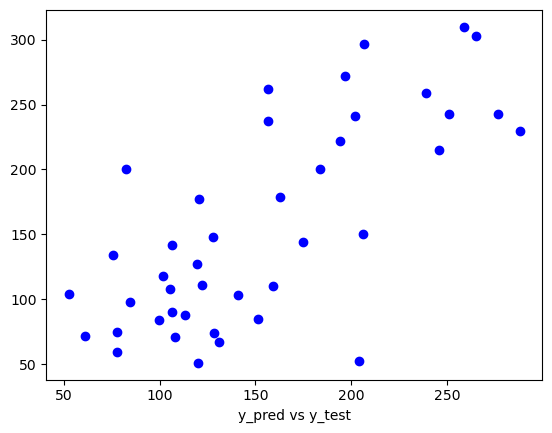

In [10]:
x = y_pred.detach().numpy()
y = y_train.detach().numpy()
plt.scatter(x, y, color = "blue")
plt.xlabel("y_pred vs y_test")
plt.show()

### References
1. https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html
2. https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
3. https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
4. https://pytorch.org/vision/stable/datasets.html

# TASK : MNSIT Digit Recognizer

1. Implement multilayer neural network that can do digit classification based on the famous MNIST dataset.
2. Predict the accuracy on 10000 test images.


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

In [25]:
# Transform to PyTorch tensor and normalize to pixel values (Mean, SD)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Import MNIST data and create DataLoader for Train and Test data
train_dataset = datasets.MNIST(root='mnist_data/', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='mnist_data/', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

In [26]:
# Multilayer Perceptron (MLP) Neural Network
class Net(nn.Module):
    
    # Define 3 fully connected layers
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    # Forward Pass Method
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return torch.log_softmax(x, dim=1)

In [27]:
# Multilayer Perceptron NN, Cross Entropy Loss, Adam
model = Net()
criterion = nn.CrossEntropyLoss()          
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [28]:
# Upgrade to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Pass through dataset 10 times
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    
    # Iterate over batches of data from train_loader
    for batch_idx, (data, target) in enumerate(train_loader):
        
        # Shape data to device and (batch size, input size)
        data, target = data.to(device), target.to(device)
        data = data.view(data.size(0), -1)
        
        # Clear gradients of optimized parameters
        optimizer.zero_grad()
        
        # Feed through NN model to obtain predicted outputs
        output = model(data)
        
        # Compute loss value and backpropogation, step optimizer
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        # Update running loss
        running_loss += loss.item()

    # Print training loss for epoch
    print('Epoch {} - Training Loss: {:.4f}'.format(epoch+1,running_loss/len(train_loader)))

Epoch 1 - Training Loss: 0.3276
Epoch 2 - Training Loss: 0.1275
Epoch 3 - Training Loss: 0.0876
Epoch 4 - Training Loss: 0.0658
Epoch 5 - Training Loss: 0.0523
Epoch 6 - Training Loss: 0.0402
Epoch 7 - Training Loss: 0.0348
Epoch 8 - Training Loss: 0.0306
Epoch 9 - Training Loss: 0.0232
Epoch 10 - Training Loss: 0.0201


In [31]:
# Set model to evaluation mode
model.eval()
correct, total = 0, 0

# Iterate through test loader, record accuracy of prediction
with torch.no_grad():
    for data, target in test_loader:
        
        # Shape data to device and (batch size, input size)
        data = data.view(data.size(0), -1)
        data, target = data.to(device), target.to(device)
        
        # Feed input through NN to obtain predicted outputs, find predicted class labels
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        
        # Update # correct predictions and total by batch size
        total += target.size(0)
        correct += (predicted == target).sum().item()

# Print Accuracy ((Correct/Total)*100%)
print('Accuracy on 10000 test images: {:.2f}%'.format(100*correct/total))

Accuracy on 10000 test images: 97.95%


In [41]:
# Convolutional Neural Netowrk (CNN)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2, 2)
        x = x.view(x.size(0), -1)  # Reshape to (batch_size, 32 * 7 * 7)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [44]:
# Convolutional NN, Cross Entropy Error Loss, Stochastic Gradient Descent
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [45]:
# Upgrade to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Pass through dataset 10 times
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    
    # Iterate over batches of data from train_loader
    for batch_idx, (data, target) in enumerate(train_loader):
        
        # Shape data to device and (batch size, input size)
        data, target = data.to(device), target.to(device)
        
        # Clear gradients of optimized parameters
        optimizer.zero_grad()
        
        # Feed through NN model to obtain predicted outputs
        output = model(data)
        output = output.view(output.size(0), -1)
        
        # Compute loss value and backpropogation, step optimizer
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        # Update running loss
        running_loss += loss.item()

    # Print training loss for epoch
    print('Epoch {} - Training Loss: {:.4f}'.format(epoch+1,running_loss/len(train_loader)))

Epoch 1 - Training Loss: 0.2785
Epoch 2 - Training Loss: 0.0607
Epoch 3 - Training Loss: 0.0414
Epoch 4 - Training Loss: 0.0324
Epoch 5 - Training Loss: 0.0263
Epoch 6 - Training Loss: 0.0215
Epoch 7 - Training Loss: 0.0186
Epoch 8 - Training Loss: 0.0153
Epoch 9 - Training Loss: 0.0128
Epoch 10 - Training Loss: 0.0106


In [48]:
# Set model to evaluation mode
model.eval()
correct, total = 0, 0

# Iterate through test loader, record accuracy of prediction
with torch.no_grad():
    for data, target in test_loader:
        
        # Shape data to device and (batch size, input size)
        data = data.view(-1, 1, 28, 28)
        data, target = data.to(device), target.to(device)
        
        # Feed input through NN to obtain predicted outputs, find predicted class labels
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        
        # Update # correct predictions and total by batch size
        total += target.size(0)
        correct += (predicted == target).sum().item()

# Print Accuracy ((Correct/Total)*100%)
print('Accuracy on 10000 test images: {:.2f}%'.format(100*correct/total))

Accuracy on 10000 test images: 99.22%
